# Ejercicio 1 - P2


## Importo dependencias

In [27]:
#Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Hago los gráficos interactivos
%matplotlib ipympl

In [28]:
#Fuente y tamaño de los caracteres en los gráficos
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

## Condiciones iniciales


In [29]:
from functions import m_inf, h_inf, n_inf, s_inf

In [30]:
#Def CI
V0_1 = -77
V0_2 = -50

y0_1_vec = np.array([V0_1, m_inf(V0_1), h_inf(V0_1), n_inf(V0_1), s_inf(V0_1)])
y0_2_vec = np.array([V0_2, m_inf(V0_2), h_inf(V0_2), n_inf(V0_2), s_inf(V0_2)])

y0 = np.concatenate((y0_1_vec, y0_2_vec))

In [31]:
#Print CI

print(y0)

[-7.70000000e+01  1.18959039e-02  8.96193170e-01  1.58791231e-01
  4.20774526e-14 -5.00000000e+01  2.50812078e-01  1.53443210e-01
  5.50814314e-01  2.06115364e-09]


In [32]:
#Print dCI/dt

from derivative import derivada

t0 = 0
I_ext0 = 0
g_syn0 = 1
V_syn0 = 1

dydt0 = derivada(t0, y0, I_ext0, g_syn0, V_syn0)

print(dydt0)


[ 6.80299212e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.87037186e-10 -6.17401167e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.87037186e-10]


## Solución numérica

In [33]:
from scipy.integrate import solve_ivp

t_ini = 0
t_fin = 400 #[ms]

I_ext = 10
g_syn = 1#0.5#2.564102564102564#1
V_syn = 0

soln = solve_ivp(derivada, [t_ini, t_fin], y0, method = "RK45", args = (I_ext,g_syn,V_syn), dense_output = True)

#Verifico que se halla resuelto el problema
if soln.success != True:
    raise ValueError(soln.message)

c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\functions.py:10: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\functions.py:11: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp(-(V + 65)/18)
c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\functions.py:39: RuntimeWarning: overflow encountered in exp
  a_m = 0.1*(V + 40)/(1 - np.exp(-(V + 40)/10))
c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\functions.py:40: RuntimeWarning: overflow encountered in exp
  b_m = 4*np.exp(-(V + 65)/18)
c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\derivative.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  dydt[1] = (m_inf(V1) - m1)/tau_m(V1)
c:\Users\lupam\OneDrive\Es

## Gráficos

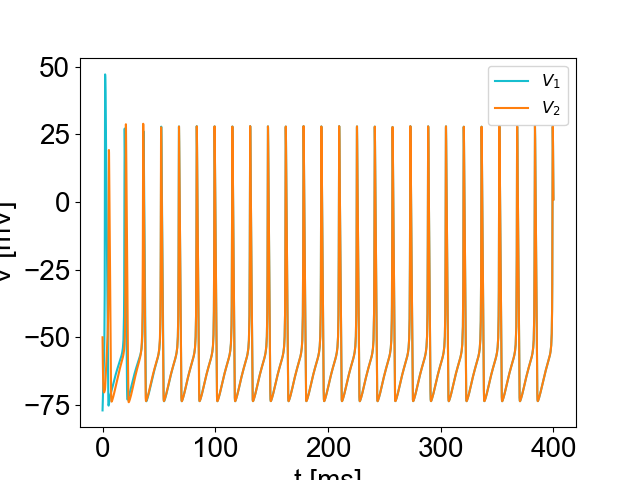

In [34]:
#V1 y V2 vs t

fig, ax = plt.subplots(1,1)

ax.plot(soln.t, soln.y[0,:], label = "$V_1$", color = "tab:cyan")
ax.plot(soln.t, soln.y[5,:], label = "$V_2$", color = "tab:orange")
ax.set_xlabel("t [ms]")
ax.set_ylabel("V [mV]")
ax.legend(fontsize = 12)
plt.show()


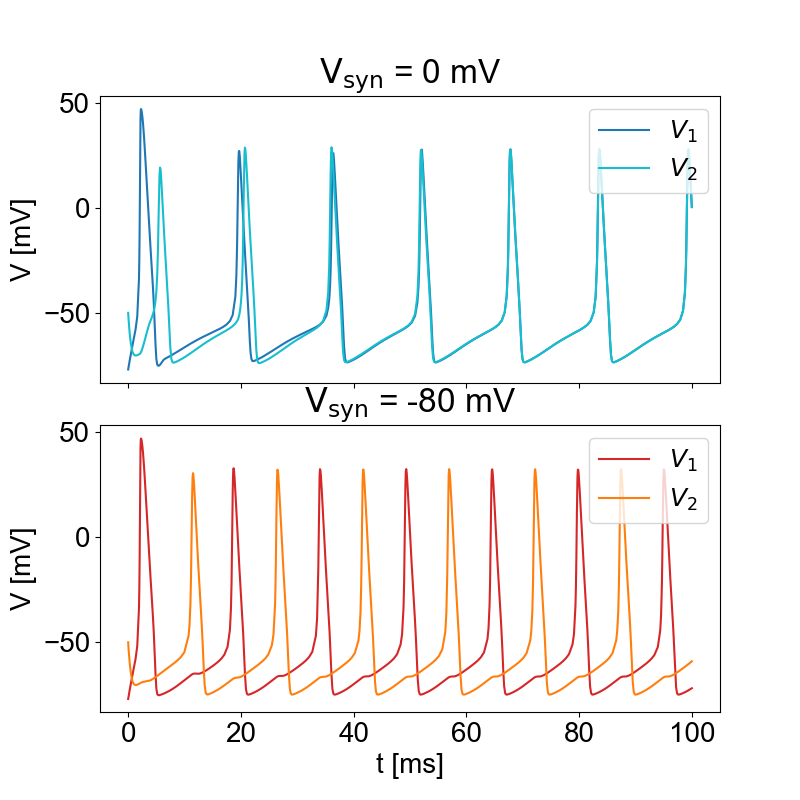

In [39]:
#Grafico para ambos V_syn

t_ini = 0
t_fin = 100 #[ms]

I_ext = 10
g_syn = 1#0.5#2.564102564102564#1
V_syn_1 = 0
V_syn_2 = -80

soln_1 = solve_ivp(derivada, [t_ini, t_fin], y0, method = "RK45", args = (I_ext,g_syn,V_syn_1), dense_output = True)
soln_2 = solve_ivp(derivada, [t_ini, t_fin], y0, method = "RK45", args = (I_ext,g_syn,V_syn_2), dense_output = True)

#Verifico que se halla resuelto el problema
if soln_1.success != True or soln_2.success != True:
    raise ValueError(soln.message)

#Grafico
fig, ax = plt.subplots(2,1, sharex=True, figsize = (8,8))
#Junto más los subplots
fig.subplots_adjust(hspace=0.15)

ax[0].plot(soln_1.t, soln_1.y[0,:], label = "$V_1$", color = "tab:blue")
ax[0].plot(soln_1.t, soln_1.y[5,:], label = "$V_2$", color = "tab:cyan")
ax[0].set_title("$\mathrm{V_{syn}}$ = 0 mV")
# ax[0].set_xlabel("t [ms]")
ax[0].set_ylabel("V [mV]")
ax[0].legend(fontsize = 18, loc = "upper right")

ax[1].plot(soln_2.t, soln_2.y[0,:], label = "$V_1$", color = "tab:red")
ax[1].plot(soln_2.t, soln_2.y[5,:], label = "$V_2$", color = "tab:orange")
ax[1].set_title("$\mathrm{V_{syn}}$ = -80 mV")
ax[1].set_xlabel("t [ms]")
ax[1].set_ylabel("V [mV]")
ax[1].legend(fontsize = 18, loc = "upper right")

plt.show()


#Guardo imagen
fig.savefig("Informe/ej1_potenciales_vs_Vsyn.png", dpi = 300, bbox_inches = "tight")



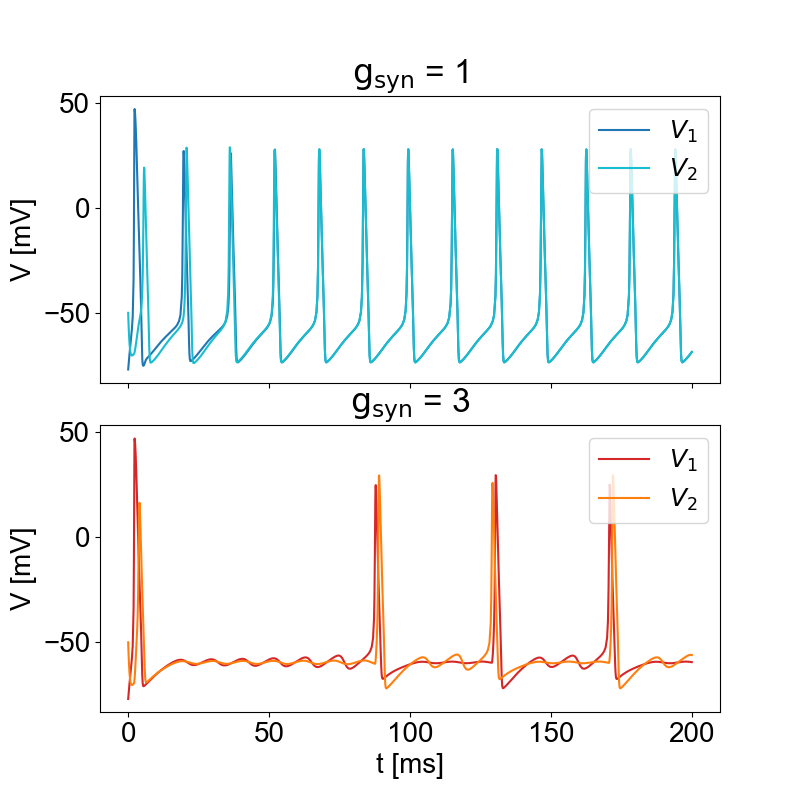

In [41]:
#Grafico para  dos alores de g_syn

t_ini = 0
t_fin = 200 #[ms]

I_ext = 10
g_syn_1 = 1 #0.5#2.564102564102564#1
g_syn_2 = 4
V_syn = 0

soln_1 = solve_ivp(derivada, [t_ini, t_fin], y0, method = "RK45", args = (I_ext,g_syn_1,V_syn), dense_output = True)
soln_2 = solve_ivp(derivada, [t_ini, t_fin], y0, method = "RK45", args = (I_ext,g_syn_2,V_syn), dense_output = True)

#Verifico que se halla resuelto el problema
if soln_1.success != True or soln_2.success != True:
    raise ValueError(soln.message)

#Grafico
fig, ax = plt.subplots(2,1, sharex=True, figsize = (8,8))
#Junto más los subplots
fig.subplots_adjust(hspace=0.15)

ax[0].plot(soln_1.t, soln_1.y[0,:], label = "$V_1$", color = "tab:blue")
ax[0].plot(soln_1.t, soln_1.y[5,:], label = "$V_2$", color = "tab:cyan")
ax[0].set_title("$\mathrm{g_{syn}}$ = 1")
# ax[0].set_xlabel("t [ms]")
ax[0].set_ylabel("V [mV]")
ax[0].legend(fontsize = 18, loc = "upper right")

ax[1].plot(soln_2.t, soln_2.y[0,:], label = "$V_1$", color = "tab:red")
ax[1].plot(soln_2.t, soln_2.y[5,:], label = "$V_2$", color = "tab:orange")
ax[1].set_title("$\mathrm{g_{syn}}$ = 3")
ax[1].set_xlabel("t [ms]")
ax[1].set_ylabel("V [mV]")
ax[1].legend(fontsize = 18, loc = "upper right")

plt.show()


#Guardo imagen
fig.savefig("Informe/ej1_potenciales_vs_gsyn.png", dpi = 300, bbox_inches = "tight")

In [37]:
def plot_for_g_syn(g_syn):
    '''
    Grafica V1 y V2 para g_syn
    
    '''

    #Resuelvo sistema de ecuaciones
    t_ini = 0
    t_fin = 2000 #[ms]

    I_ext = 10
    V_syn = 0

    soln = solve_ivp(derivada, [t_ini, t_fin], y0, method = "RK45", args = (I_ext,g_syn,V_syn), dense_output = True)

    #Verifico que se halla resuelto el problema
    if soln.success != True:
        raise ValueError(soln.message)

    fig, ax = plt.subplots(1,1)

    ax.plot(soln.t, soln.y[0,:], label = "$V_1$")
    ax.plot(soln.t, soln.y[5,:], label = "$V_2$")
    ax.set_xlabel("t [ms]")
    ax.set_ylabel("V [mV]")
    ax.set_ylim([-100, 50])
    ax.legend()
    plt.show()

    return

In [38]:
#Grafico para g_syn como barrera scrolleable usando widgets

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(plot_for_g_syn, g_syn = widgets.FloatSlider(min = 0, max = 100, step = 0.1, value = 1))


interactive(children=(FloatSlider(value=1.0, description='g_syn'), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_for_g_syn(g_syn)>

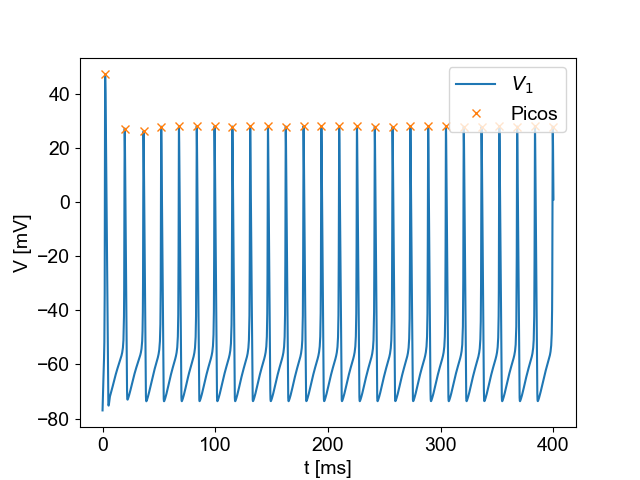

In [ ]:
#Busco los picos de V1

from scipy.signal import find_peaks

V1 = soln.y[0,:]
# V2 = soln.y[5,:]

peaks, _ = find_peaks(V1, height = 0)
# peaks_V2, _ = find_peaks(V2, height = 0)

fig, ax = plt.subplots(1,1)

ax.plot(soln.t, soln.y[0,:], label = "$V_1$")
ax.plot(soln.t[peaks], soln.y[0,peaks], "x", label = "Picos")
# ax.plot(soln.t, soln.y[0,:], label = "$V_2$")
# ax.plot(soln.t[peaks], soln.y[0,peaks], "x", label = "Picos")
ax.set_xlabel("t [ms]")
ax.set_ylabel("V [mV]")
ax.legend()
plt.show()


In [ ]:
def tasa_de_disparo(V_signal, t_fin, t_ini):
    '''
    Calcula la tasa de disparo de V
    
    '''

    peaks, _ = find_peaks(V_signal, height = 0)
    
    #Calculo la tasa de disparo
    tasa = len(peaks)/(t_fin - t_ini)
    
    return tasa

def desfasaje(t_signal, V1_signal, V2_signal):
    '''
    Calcula el desfasaje entre V1 y V2
    
    '''
    
    peaks1, _ = find_peaks(V1_signal, height = 0)
    peaks2, _ = find_peaks(V2_signal, height = 0)
    
    #Determino qué picos son consecutivos entre sí. Este criterio puedo aplicarlo porque ya conozco cómo se comporta el problema
    #Determino el primero de los picos
    if peaks1[0] < peaks2[0]:
        #Determino qué pico tiene peaks2[0] más cerca
        if abs(peaks1[0] - peaks2[0]) < abs(peaks1[1] - peaks2[0]):
            peaks1 = peaks1[0:]
        else:
            peaks1 = peaks1[1:]
    else:
        #Determino qué pico tiene peaks1[0] más cerca
        if abs(peaks1[0] - peaks2[0]) < abs(peaks1[0] - peaks2[1]):
            peaks2 = peaks2[0:]
        else:
            peaks2 = peaks2[1:]

    #Calculo el desfasaje como promedio de desfasajes entre picos consecutivos

    desfasajes = np.empty(min(len(peaks1), len(peaks2)))
    for i in range(len(desfasajes)):
        desfasajes[i] = t_signal[peaks1[i]] - t_signal[peaks2[i]]
    
    return np.mean(desfasajes)

In [ ]:
def any_vs_g_syn(V_syn, g_syn):

    #Resuelvo sistema de ecuaciones
    t_ini = 0
    t_fin = 2000 #[ms]

    I_ext = 10

    soln = solve_ivp(derivada, [t_ini, t_fin], y0, method = "RK45", args = (I_ext,g_syn,V_syn), dense_output = True)

    #Verifico que se halla resuelto el problema
    if soln.success != True:
        raise ValueError(soln.message)

    #Restrinjo los valores desde que hay un pico en el estacionario
    t_ini_new = t_fin/2
    t_ini_new_ind = np.where(soln.t >= t_ini_new)[0][0]
    #Comienzo a medir desde el primer pico luego de t_ini_new
    peaks_V1, _ = find_peaks(soln.y[0,t_ini_new_ind:], height = 0)
    peaks_V2, _ = find_peaks(soln.y[5,t_ini_new_ind:], height = 0)
    t_ini_new_ind + np.min([peaks_V1[0], peaks_V2[0]])
    t_ini_new = soln.t[t_ini_new_ind]


    #Calculo la tasa de disparo
    tasa_V1 = tasa_de_disparo(soln.y[0,t_ini_new_ind:], t_fin, t_ini_new)
    tasa_V2 = tasa_de_disparo(soln.y[5,t_ini_new_ind:], t_fin, t_ini_new)

    #Calculo el desfasaje
    desfasaje_V1_V2 = desfasaje(soln.t[t_ini_new_ind:], soln.y[0,t_ini_new_ind:], soln.y[5,t_ini_new_ind:])

    return tasa_V1, tasa_V2, desfasaje_V1_V2

In [ ]:
any_vs_g_syn(V_syn, 0.5)

(0.06603471474878415, 0.06603471474878415, 0.0)

In [ ]:

V_syn = -80

N = 20
g_syn_vec = np.linspace(0,10, num = N)

any_vs_g_syn_vec = np.empty([N, 3])

for i in range(N):
    any_vs_g_syn_vec[i] = any_vs_g_syn(V_syn, g_syn_vec[i])




c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\derivative.py:42: RuntimeWarning: overflow encountered in scalar power
  dydt[0 + N_eq] = (1/C_hat) *(I_ext + I_syn(V2, s2, g_syn, V_syn) - g_K_adim*n2**4*(V2 - V_K) - g_Na_adim*m2**3*h2*(V2 - V_Na) - g_L_adim*(V2 - V_L))
c:\ProgramData\Anaconda3\envs\Maestria3\Lib\site-packages\scipy\integrate\_ivp\rk.py:109: RuntimeWarning: invalid value encountered in divide
  return norm(self._estimate_error(K, h) / scale)
c:\Users\lupam\OneDrive\Escritorio\GitHub\RedesNeuronales\Practicas\practica-2\ejercicio_1\derivative.py:42: RuntimeWarning: overflow encountered in scalar multiply
  dydt[0 + N_eq] = (1/C_hat) *(I_ext + I_syn(V2, s2, g_syn, V_syn) - g_K_adim*n2**4*(V2 - V_K) - g_Na_adim*m2**3*h2*(V2 - V_Na) - g_L_adim*(V2 - V_L))


KeyboardInterrupt: 

In [ ]:
#Guardo datos como .npy
data = np.vstack([g_syn_vec, any_vs_g_syn_vec.T])
file_name = f"data_V_syn_{V_syn:.2f}.npy"

np.save(file_name, data)


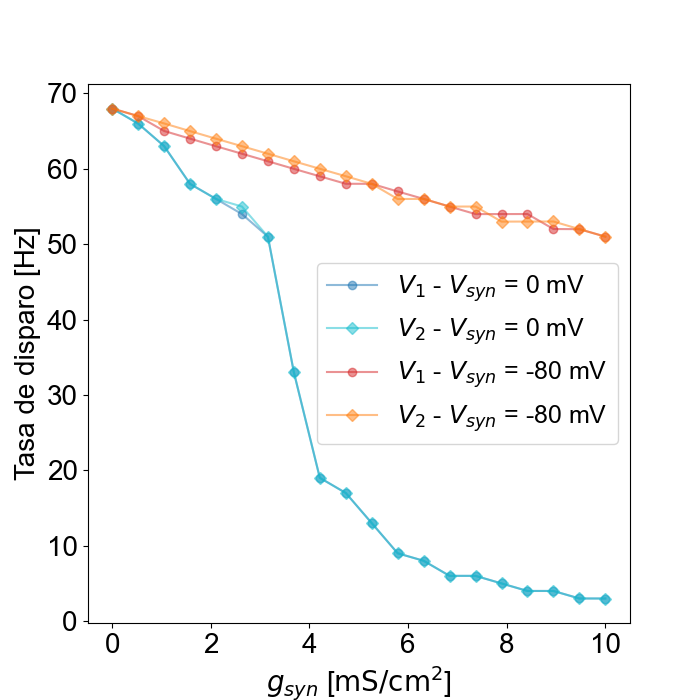

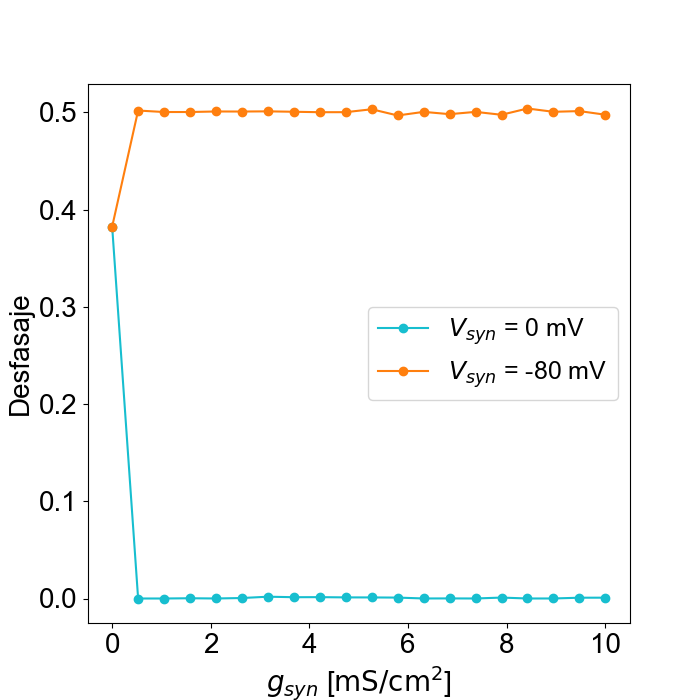

In [44]:
#Graph
#Cargo datos
data_1 = np.load("data_V_syn_0.00.npy")
data_2 = np.load("data_V_syn_-80.00.npy")

#Desempaqueto
g_syn_vec_1, any_vs_g_syn_vec_1 = data_1[0], data_1[1:].T
g_syn_vec_2, any_vs_g_syn_vec_2 = data_2[0], data_2[1:].T

factor_ms_to_s = 1000

fig, ax = plt.subplots(1,1, figsize = (7,7))


ax.plot(g_syn_vec_1, any_vs_g_syn_vec_1[:,0]*factor_ms_to_s, "o-", label = r"$V_1$ - $V_{syn}$ = 0 mV", alpha = 0.5, color = "tab:blue")
ax.plot(g_syn_vec_1, any_vs_g_syn_vec_1[:,1]*factor_ms_to_s, "D-", label = r"$V_2$ - $V_{syn}$ = 0 mV", alpha = 0.5, color = "tab:cyan")
ax.plot(g_syn_vec_1, any_vs_g_syn_vec_2[:,0]*factor_ms_to_s, "o-", label = r"$V_1$ - $V_{syn}$ = -80 mV", alpha = 0.5, color = "tab:red")
ax.plot(g_syn_vec_1, any_vs_g_syn_vec_2[:,1]*factor_ms_to_s, "D-", label = r"$V_2$ - $V_{syn}$ = -80 mV", alpha = 0.5, color = "tab:orange")

ax.set_xlabel("$g_{syn}$ [$\mathrm{mS/cm^2}$]")
ax.set_ylabel("Tasa de disparo [Hz]")
#Ubico leyenda abajo a la izquierda
#Cambio el tamaño de la leyenda
ax.legend(fontsize = 18)

plt.show()


#Guardo imagen
fig.savefig("Informe/ej1_tasa.png", dpi = 300, bbox_inches = "tight")

fig, ax = plt.subplots(1,1, figsize = (7,7))

tasa_de_disparo_mean_1 = (any_vs_g_syn_vec_1[:,0] + any_vs_g_syn_vec_1[:,1])/2
tasa_de_disparo_mean_2 = (any_vs_g_syn_vec_2[:,0] + any_vs_g_syn_vec_2[:,1])/2

ax.plot(g_syn_vec_1, np.abs(any_vs_g_syn_vec_1[:,2])*tasa_de_disparo_mean_1, "o-", label = "$V_{syn}$ = 0 mV", color = "tab:cyan")
ax.plot(g_syn_vec_2, np.abs(any_vs_g_syn_vec_2[:,2])*tasa_de_disparo_mean_2, "o-", label = "$V_{syn}$ = -80 mV", color = "tab:orange")

ax.set_xlabel("$g_{syn}$ [$\mathrm{mS/cm^2}$]")
ax.set_ylabel("Desfasaje")
ax.legend(fontsize = 18)

plt.show()

#Guardo imagen
fig.savefig("Informe/ej1_desfasaje.png", dpi = 300, bbox_inches = "tight")




In [ ]:
np.min( any_vs_g_syn_vec[:,2])
#Busco el g
g_syn_vec[np.where(any_vs_g_syn_vec[:,2] == np.min( any_vs_g_syn_vec[:,2]))[0][0]]


2.564102564102564